### 결정트리(decision tree)

#### 01 의사결정트리 기본
    (가) decision tree는 classification(분류)와 regression(회귀) 문제에 널리 사용하는 모델이다.
    (나) 스무고개 놀이의 질문과 비슷하다.

In [1]:
# mglearn 설치 필요
# !pip install mglearn

In [2]:
!pip install mglearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 540 kB 5.3 MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582639 sha256=f152b89edc37147c2dd912a229e907344d8839b9632c91ab4fa0c3c4c864aed4
  Stored in directory: /root/.cache/pip/wheels/f1/17/e1/1720d6dcd70187b6b6c3750cb3508798f2b1d57c9d3214b08b
Successfully built mglearn


In [3]:
import matplotlib.pyplot as plt
import mglearn

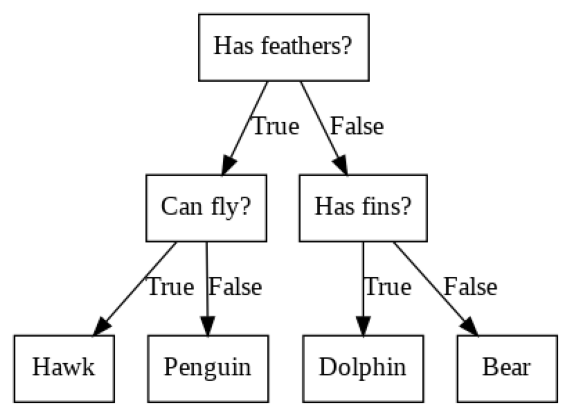

In [4]:
plt.figure(figsize=(10,10))
mglearn.plots.plot_animal_tree()

    (가) 트리에 사용되는 세 개의 feature가 있음.
         'Has feathers?'(날개가 있나요?)
         'Can fly?'(날수 있나요?)
         'Has fins?'(지느러미가 있나요?)
    (나) 이 머신러닝 문제는 네 개의 클래스로 구분하는 모델을 생성
         네 개의 클래스 - 매, 펭권, 돌고래, 곰
    (다) 노드 종류
         맨 위의 노드 - Root Node(루트 노드)
         맨 마지막 노드 - Leaf Node(리프 노드)
         target가 하나로만 이루어진 Leaf Node(리프 노드) 순수 노드 (pure node)
    (라) 노드 분기(각 노드)
         범주형은 데이터를 구분하는 질문 을 통해 나눈다.
         연속형은 특성 i가 a보다 큰가?의 질문으로 나눈다.

#### 02 의사결정 트리 구축

In [5]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
import seaborn as sns

In [6]:
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    stratify=cancer.target, 
                                                    test_size = 0.3,
                                                    random_state=77)

In [7]:
tree = DecisionTreeClassifier(max_depth=2, random_state=0)
tree.fit(X_train, y_train)

print("훈련 세트 정확도 : {:.3f}".format(tree.score(X_train, y_train)))
print("테스트 세트 정확도 : {:.3f}".format(tree.score(X_test, y_test)))

훈련 세트 정확도 : 0.972
테스트 세트 정확도 : 0.912


#### 03 의사 결정 트리 복잡도 변경
    * 결정트리의 깊이를 제한하지 않으면 트리는 무작정 깊어지고 복잡해 질 수 있다.
    * 첫번째는 트리가 일정 깊이에 도달하면 트리의 성장을 멈추게 하는 것.
        * max_depth를 이용

In [8]:
for i in range(1,7,1):
  tree = DecisionTreeClassifier(max_depth=i, random_state=0)
  tree.fit(X_train, y_train)
  print(f"max_depth : {i}")
  print("훈련 세트 정확도 : {:.3f}".format(tree.score(X_train, y_train)))
  print("테스트 세트 정확도 : {:.3f}".format(tree.score(X_test, y_test)))

max_depth : 1
훈련 세트 정확도 : 0.932
테스트 세트 정확도 : 0.883
max_depth : 2
훈련 세트 정확도 : 0.972
테스트 세트 정확도 : 0.912
max_depth : 3
훈련 세트 정확도 : 0.982
테스트 세트 정확도 : 0.906
max_depth : 4
훈련 세트 정확도 : 0.985
테스트 세트 정확도 : 0.906
max_depth : 5
훈련 세트 정확도 : 0.992
테스트 세트 정확도 : 0.889
max_depth : 6
훈련 세트 정확도 : 0.997
테스트 세트 정확도 : 0.901


In [9]:
tree = DecisionTreeClassifier(max_depth=2, random_state=0)
tree.fit(X_train, y_train)
print(f"max_depth : {i}")
print("훈련 세트 정확도 : {:.3f}".format(tree.score(X_train, y_train)))
print("테스트 세트 정확도 : {:.3f}".format(tree.score(X_test, y_test)))

max_depth : 6
훈련 세트 정확도 : 0.972
테스트 세트 정확도 : 0.912


#### 04 유방암 데이터 셋을 이용한 모델 구축 및 시각화

In [10]:
from sklearn.tree import export_graphviz
import graphviz

In [11]:
export_graphviz(tree, 
                out_file="tree.dot", 
                class_names=['악성', '양성'],
                feature_names = cancer.feature_names, 
                impurity = False,  # gini 계수
                filled=True)       # color 

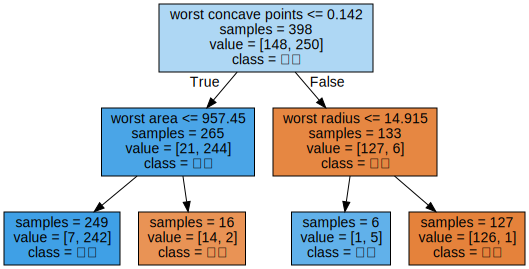

In [12]:
with open("tree.dot") as f:
  dot_graph = f.read()
display(graphviz.Source(dot_graph))

#### 05 트리의 특성 중요도
    * 특성 중요도 : 이 값은 0과 1사이의 숫자.
        * 0은 트리에서 전혀 사용되지 않음.
        * 1은 트리에서 완벽하게 타깃 클래스를 예측했다.
        * 특성 중요도의 전체 합은 1이다.
    * 특성의 featureimportance 값이 낮다고 해서 특성이 유용하지 않다는 것이 아니다.
    * 단지 트리가 그 특성을 선택하지 않았다는 것.

In [13]:
import numpy as np

In [14]:
def plot_feature_imp_cancer(model):
    n_features = cancer.data.shape[1]
    imp = model.feature_importances_
    plt.barh(range(n_features) , imp, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    
    plt.xlabel("feature importance")
    plt.ylabel("feature")
    plt.ylim(-1, n_features)

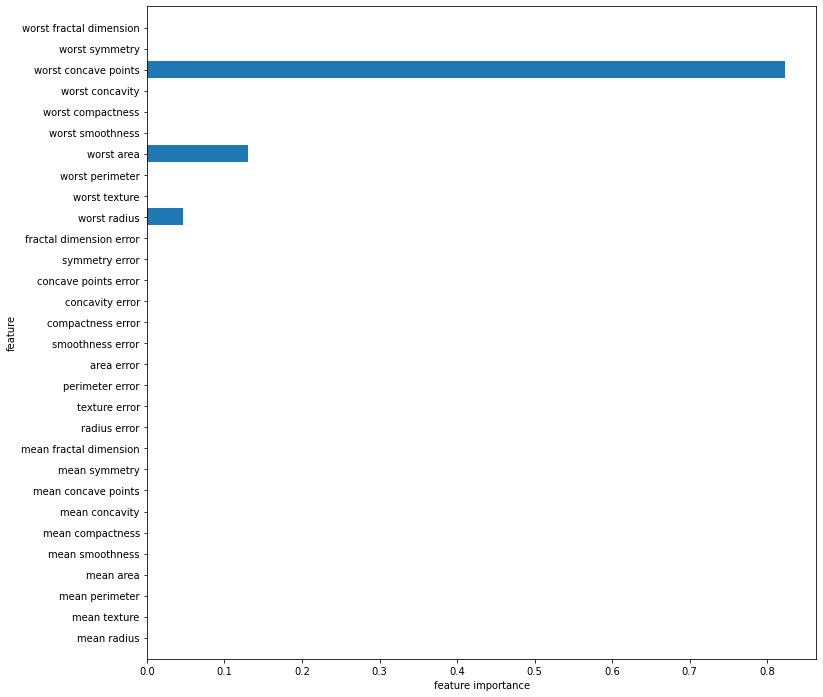

In [15]:
plt.figure(figsize=(12,12))
plot_feature_imp_cancer(tree)

    * worst_concave_points이 가장 중요한 특성으로 나타난다.
         * 첫번째 노드에서 두 클래스를 꽤 잘 나누고 있다.
    * featureimportance 값이 낮다고 해서 특성이 유용하지 않다는 뜻이 아님.

### 01. 기본- 결정트리(decision tree)
    (가) decision tree는 classification(분류)와 regression(회귀)  문제에 널리 사용하는 모델이다.
    (나) 스무고개 놀이의 질문과 비슷하다.

In [16]:
# 라이브러리 불러오기
import pandas as pd
from sklearn.tree import DecisionTreeClassifier     
from sklearn.model_selection import train_test_split 

##### Data Fields

    Pregnancies : 임신	
    Glucose : 포도당	
    BloodPressure : 혈압	
    SkinThickness : 피부두께	
    Insulin : 인슐린	
    BMI : BMI
    Diabetes Pedigree Function : 당뇨병혈통기능	
    Age : 나이	
    Outcome : 결과

In [17]:
pima = pd.read_csv("diabetes.csv")

In [18]:
pima.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [19]:
pima.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


##### Feature Selection

In [20]:
pima.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [21]:
pima.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [22]:
pima.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


In [23]:
pima.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [24]:
# 데이터 셋 (feature와 target 변수로 나누기)
feature_cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']
X = pima[feature_cols] # Features
y = pima.Outcome       # Target variable

##### 데이터 나누기

In [25]:
# 데이터 셋 나누기
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [26]:
print(X_test.columns)
print(X_train.columns)
print(y_train.shape)

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')
Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')
(537,)


In [27]:
# 의사결정 트리 모델 생성 및 학습
model = DecisionTreeClassifier(max_depth=5, random_state=0).fit(X_train,y_train)

# 예측
y_pred = model.predict(X_test)

##### 모델 평가

In [28]:
from sklearn import metrics

In [29]:
# Model Accuracy, 얼마나 정확한가? 정확도
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7575757575757576


##### 시각화 1

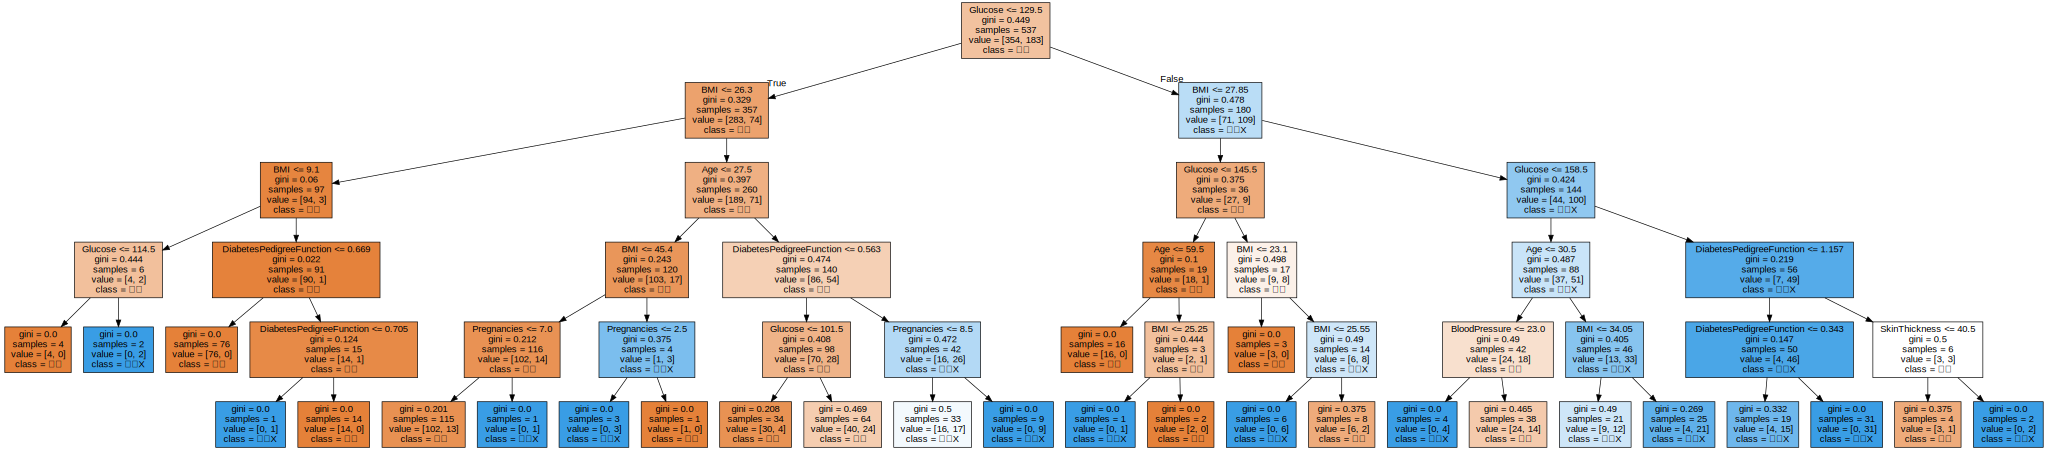

In [30]:
from sklearn.tree import export_graphviz
export_graphviz(model, out_file="tree.dot", 
                class_names=['당뇨', '당뇨X'],
                feature_names = feature_cols, 
                impurity = True,  # gini 계수
                filled=True)       # color 

import graphviz
with open("tree.dot") as f:
  dot_graph = f.read()
  
display(graphviz.Source(dot_graph))

##### 시각화 2
     png파일로 만들기

In [31]:
import pydotplus
from IPython.display import Image  

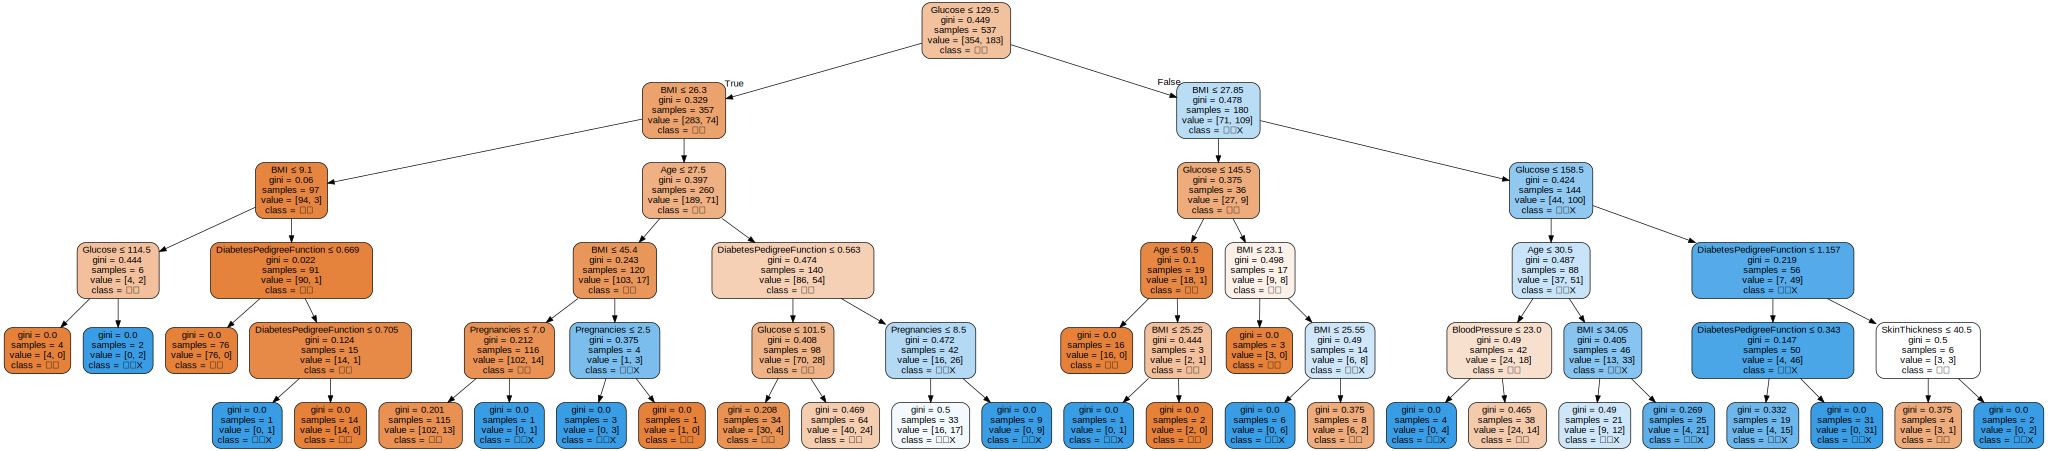

In [32]:
import graphviz

# model : 모델명, 
# class_n : 클래스명, 
# feature_n : 특징 이름
def tree_plot(model, class_n, feature_n):
  export_graphviz(model, out_file="tree.dot", 
                class_names = class_n,
                feature_names = feature_n, 
                impurity = True,  # gini 계수
                filled=True, 
                rounded=True,
                special_characters=True)       # color
  
  with open("tree.dot") as f:
    dot_graph = f.read()
  display(graphviz.Source(dot_graph))

tree_plot(model, ['당뇨', '당뇨X'], feature_cols)

##### 모델 성능 개선

In [33]:
model = DecisionTreeClassifier(criterion="entropy", 
                               max_depth=3,
                               random_state=0)  # 의사결정트리 모델
model.fit(X_train,y_train)   # 학습
y_pred = model.predict(X_test)  # 데이터 셋 예측

# 정확도 확인
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7705627705627706


### 01. 기본- 결정트리(decision tree)
    의사결정트리를 이미지로 이해하기
    의사결정트리 회귀 모델 만들기

In [34]:
from IPython.display import display, Image
import matplotlib.pyplot as plt
import mglearn

In [35]:
import matplotlib
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt
import platform

In [36]:
# 한글 및 마이너스 표시 설정
path = "C:/Windows/Fonts/malgun.ttf"
if platform.system() == "Windows":
    font_name = font_manager.FontProperties(fname=path).get_name()
    matplotlib.rc('font', family=font_name)
elif platform.system()=="Darwin":
    rc('font', family='AppleGothic')
else:
    print("Unknown System")

matplotlib.rcParams['axes.unicode_minus'] = False
%matplotlib inline

Unknown System


##### 01. 의사결정트리- 모델 이해
    (1) 데이터 셋 - 연속형 데이터
    (2) 첫번째 나누기 x[1] = 0.0596
    (3) 두번째 나누기 x[0] <= 0.4177, x[0] <= 1.1957

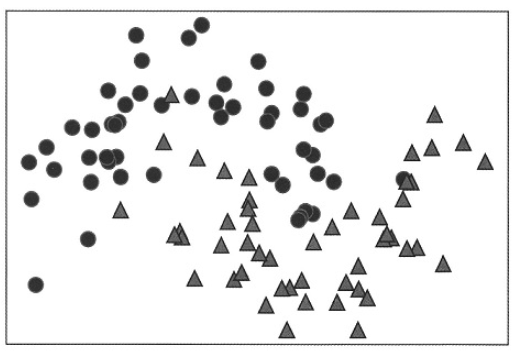

In [37]:
display(Image(filename='decisiontree01.png'))

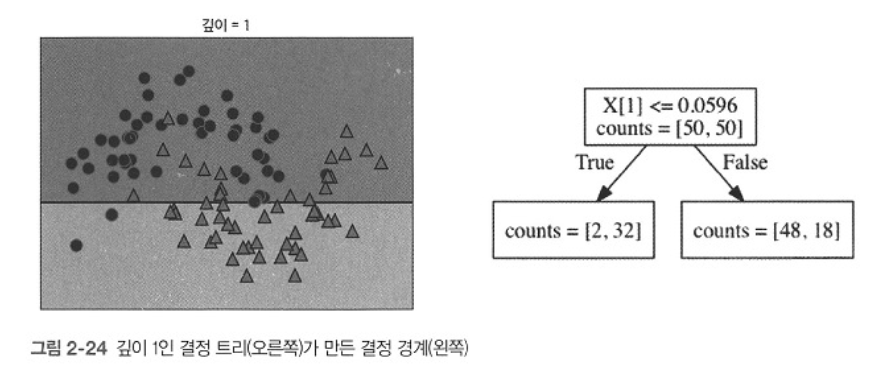

In [38]:
display(Image(filename='decisiontree02.png'))

     * 노드1 : class 0에 속한 데이터 수 2개, class 1에 속한 데이터 수 32개
     * 노드2 : class 0에 속한 데이터 수 48개, class 1에 속한 데이터 수 18개

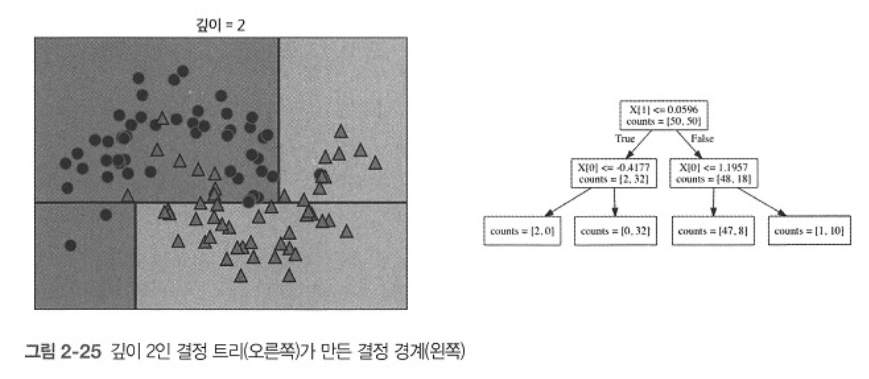

In [39]:
display(Image(filename='decisiontree03.png'))

##### 설명
    (가) 의사결정트리는 반복된 프로세스에 의해 노드가 두 개를 가진 이진의사결정트리를 만든다. (하나의 축을 따라 데이터를 둘로 나눈다.)
    (나) 각 노드의 테스트(각 노드의 질문)는 하나의 특성(feature)에 관해서만 이루어진다.
    (다) 데이터를 분할하는 것은 결정트리 리프(leaf)가 노드가 하나의 target(목표 값)을 가질 때까지 반복.
    (라) Target(목표 값) 하나로만 이루어진 Leaf node(리프 노드)를 순수노드(pure node)라고 한다.

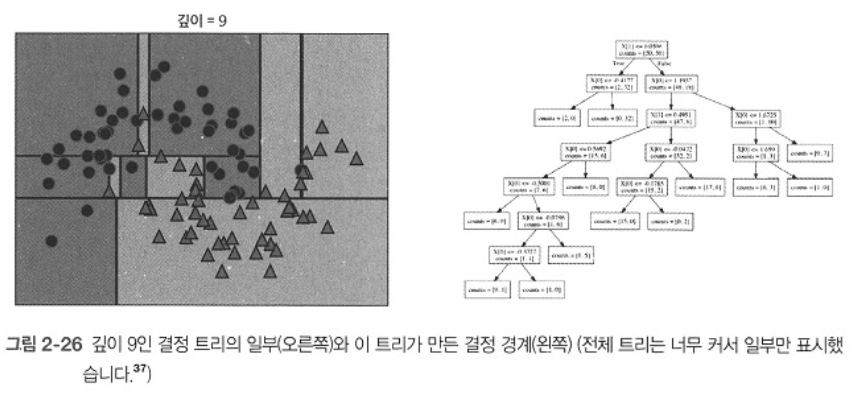

In [40]:
display(Image(filename='decisiontree04.png'))

    모델을 학습 후, 예측할 때, 새로운 데이터(test) 셋에 대한 예측은 주어진 데이터 포인트가 분할한 영역 중에 어디에 놓이는 가를 확인하면 된다.

### 02. 회귀 문제에서의 의사결정트리(decision tree)
    (1) 각 노드의 테스트 결과에 따라 트리를 탐색(루트노드->리프노드)해 나가고 새로운 데이터 포인트에 해당되는 리프 노드(leaf node)를 찾는다.
    (2) 찾은 리프 노드(leaf node)의 훈련 데이터 평균값이 이 데이터 포인트의 출력이 된다.
        * 리프노드가 8,9의 값을 갖고 있다면 출력은 8.5가 된다.

##### 실습
    컴퓨터 메모리 가격 동향 데이터 셋 활용해 보기

In [41]:
import os
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

##### 데이터 로드

In [43]:
ram_prices = pd.read_csv(os.path.join(mglearn.datasets.DATA_PATH, 
                                     "ram_price.csv"))  ##kaggle에서 다운로드

##### 시각화
* x축 : 년 (날짜)
* y축 : 가격 ( 해당 년도의 램(RAM) 1메가바이트당 가격 ) - 로그 스케일

In [44]:
import numpy as np
import seaborn as sns

In [45]:
np.min(ram_prices.price), np.min( np.log(ram_prices.price) )

(0.0037, -5.599422459331958)

In [46]:
np.log(0.0037)

-5.599422459331958

Text(0, 0.5, 'price($/Mbyte)')

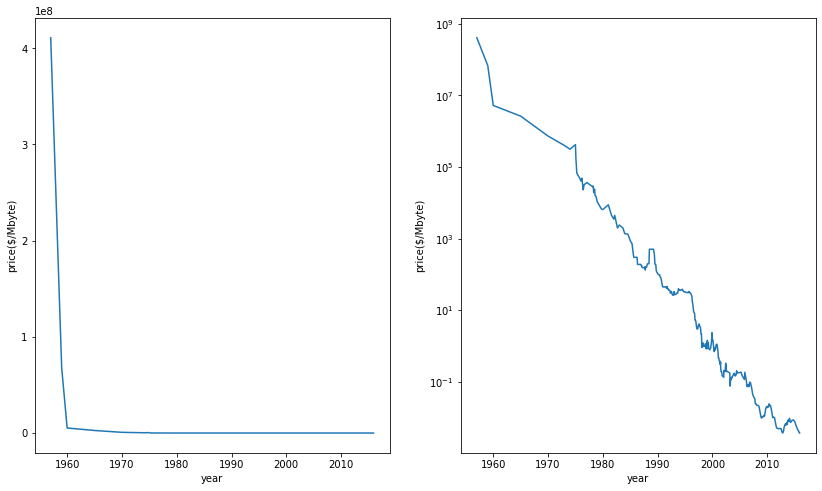

In [47]:
# 한글 폰트가 지수에 음수를 표시하지 못하므로 ytick의 폰트를 바꾸어 줍니다.
# plt.yticks(fontname = "Arial") 

plt.figure(figsize=(14,8))

plt.subplot(1,2,1)
plt.plot(ram_prices.date, ram_prices.price) 
plt.xlabel("year")
plt.ylabel("price($/Mbyte)")

# Make a plot with log scaling on the y axis.(y축 로그 스케일)
plt.subplot(1,2,2)
plt.semilogy(ram_prices.date, ram_prices.price) 
plt.xlabel("year")
plt.ylabel("price($/Mbyte)")

##### price 분포 확인

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


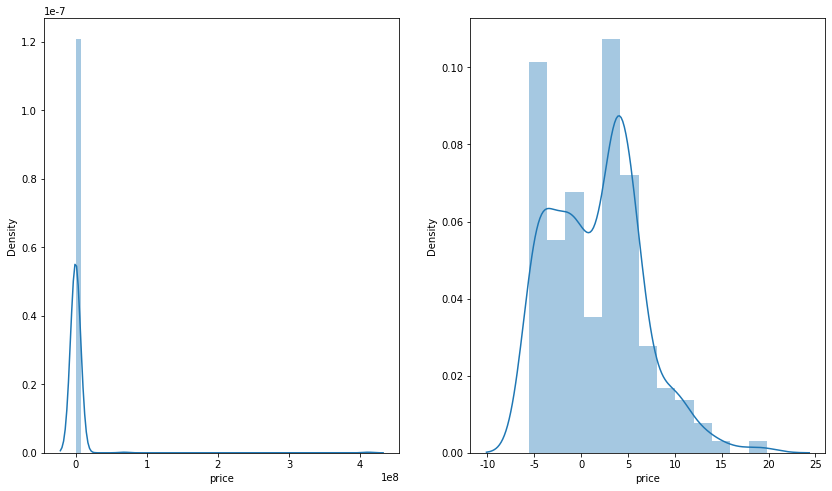

In [48]:
plt.figure(figsize=(14,8))

plt.subplot(1,2,1)
sns.distplot(ram_prices.price)

plt.subplot(1,2,2)
log_price = np.log(ram_prices.price)
sns.distplot(log_price)

##### 모델 선택 및 학습

In [49]:
from sklearn.tree import DecisionTreeRegressor

# 2000년 이전을 학습 데이터로,습
# 2000년 이후를 테스트 데이터로 변경
data_train = ram_prices[ram_prices.date < 2000]
data_test = ram_prices[ram_prices.date >= 2000]

# 가격 예측을 위해 날짜 특성만을 이용합니다
X_train = data_train.date[:, np.newaxis]

# 데이터와 타깃 사이의 관계를 간단하게 만들기 위해 로그 스케일로 바꿉니다
y_train = np.log(data_train.price)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':


In [50]:
tree = DecisionTreeRegressor().fit(X_train, y_train)
linear_reg = LinearRegression().fit(X_train, y_train)

# 예측은 전체 기간에 대해서 수행합니다
X_all = ram_prices.date[:, np.newaxis]

pred_tree = tree.predict(X_all)
pred_lr = linear_reg.predict(X_all)

# 예측한 값의 로그 스케일을 되돌립니다
price_tree = np.exp(pred_tree)
price_lr = np.exp(pred_lr)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  """


findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


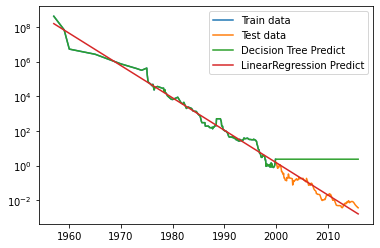

In [51]:
plt.yticks(fontname = "Arial") # 한글 폰트가 지수에 음수를 표시하지 못하므로 ytick의 폰트를 바꾸어 줍니다.
plt.semilogy(data_train.date, data_train.price, label="Train data")
plt.semilogy(data_test.date, data_test.price, label="Test data")
plt.semilogy(ram_prices.date, price_tree, label="Decision Tree Predict")
plt.semilogy(ram_prices.date, price_lr, label="LinearRegression Predict")
plt.legend()

##### 두 모델은 확연한 차이를 보인다.
    (1) 선형모델은 직선으로 데이터를 근사한다.
    (2) 트리모델은 훈련 데이터를 완벽하게 예측한다.
    (3) 트리 모델은 훈련 데이터 밖의 새로운 데이터를 예측할 능력이 없다. - 과적합
    (4) (3)번의 내용이 트리 기반 모델의 공통된 단점이다.

#### 03. 의사결정 트리의 단점 및 장점
##### 장점
    첫째, 만들어진 모델을 쉽게 시각화할 수 있어서, 비전문가도 이해하기 쉽다.
    둘째, 데이터의 스케일에 구애받지 않는다.(정규화, 표준화 전처리 과정 필요 없다.)

##### 단점
    * 사전 가지치기의 사용하지만 Overfitting(과대적합) 되는 경향이 있다.
    * 리프 노드가 순수 노드가 될때까지 진행하면, 모델이 매우 복잡해지고 훈련 데이터의 과대적합(overfitting)이 된다. -> 순수 노드로 이루어진 트리는 훈련 세트에 100% 정확하게 맞는다.

#### 04. Overfitting(과적합)을 막는 두가지 전략
    (1) 트리 생성을 일찍 중단하는 전략(pre-pruning) - 사전 가지치기
    (2) 트리를 만든 후, 데이터 포인트가 적은 노드를 삭제(사후 가지치기-post-pruning) 하거나 병합하는 전략.(가지치기)-pruning

#### 05. 그렇다면 어떻게 사전 가지치를 할 수 있을까?
##### 트리의 최대 깊이 제한 (max_depth)
    * max_depth = 4라면 연속된 질문의 옵션을 최대 4개로 제한
    * 트리 깊이를 제한하면 과대적합이 줄어든다.
    * 훈련 세트의 정확도는 떨어지지만 테스트 성능은 개선

##### 리프의 최대 개수 제한 (max_leaf_nodes)
##### 노드 분할을 위한 포인트의 최소 개수 지정 (min_sample_leaf)
##### 사전 가지치기만 지원, DecisionTreeRegressor, DecisionTreeClassifier

In [52]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
import seaborn as sns

In [53]:
cancer = load_breast_cancer()
all_X = cancer.data
all_Y = cancer.target

##### test_size를 변경해 가면서 모델 생성

In [54]:
def testTreeModel(TestSize=0.3):
    cancer = load_breast_cancer()
    all_X = cancer.data
    all_Y = cancer.target
    X_train, X_test, y_train, y_test = train_test_split(all_X, 
                                        all_Y, 
                                        stratify=cancer.target, 
                                        test_size = TestSize,
                                        random_state=77)
    
    tree = DecisionTreeClassifier(random_state=0)
    tree.fit(X_train, y_train)
    print("훈련 세트 정확도 : {:.3f}".format(tree.score(X_train, y_train)))
    print("테스트 세트 정확도 : {:.3f}".format(tree.score(X_test, y_test)))

모든 리프 노드가 순수 노드이므로 훈련 세트의 정확도는 100%이다.

In [55]:
testTreeModel(0.3)  # 테스트 사이즈 30%
testTreeModel(0.1)  # 테스트 사이즈 10%
testTreeModel(0.2)  # 테스트 사이즈 20%

훈련 세트 정확도 : 1.000
테스트 세트 정확도 : 0.918
훈련 세트 정확도 : 1.000
테스트 세트 정확도 : 0.912
훈련 세트 정확도 : 1.000
테스트 세트 정확도 : 0.912


##### max_depth를 변경해 가면서 모델 생성

In [56]:
def testTreeModel(TestSize=0.3, treedepth=3):
    cancer = load_breast_cancer()
    X_train, X_test, y_train, y_test = train_test_split(all_X, 
                                            all_Y, 
                                            stratify=cancer.target, 
                                            test_size = TestSize,
                                            random_state=77)
    tree = DecisionTreeClassifier(max_depth=treedepth, random_state=0)
    tree.fit(X_train, y_train)
    print("훈련 세트 정확도 : {:.3f}".format(tree.score(X_train, y_train)))
    print("테스트 세트 정확도 : {:.3f}".format(tree.score(X_test, y_test)))

In [57]:
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(all_X, 
                                             all_Y, 
                                             stratify=cancer.target, 
                                             test_size = 30,
                                             random_state=77)
tree = DecisionTreeClassifier(max_depth=2, random_state=0)
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=0)

#### 06. 트리(tree)의 특성 중요도(feature importance)
    * 특성 중요도 : 이 값은 0과 1사이의 숫자.
        - 0은 전혀 사용되지 않음.
        - 1은 완벽하게 타깃 클래스를 예측했다.
    * 특성 중요도의 전체 합은 1이다.
    * 특성의 featureimportance 값이 낮다고 해서 특성이 유용하지 않다는 것이 아니다. 단지 트리가 그 특성을 선택하지 않았다는 것.

In [58]:
## 특성의 중요도
tree.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.01305268, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.85298388, 0.        , 0.        ,
       0.        , 0.        , 0.13396343, 0.        , 0.        ])

In [59]:
cancer.data.shape[1]  # 특성 개수

30

In [60]:
import matplotlib.pyplot as plt
import numpy as np

import matplotlib
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt
import platform

In [61]:
def plot_feature_imp_cancer(model):
    n_features = cancer.data.shape[1]
    imp = model.feature_importances_
    plt.barh(range(n_features) , imp, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    
    plt.xlabel("특성 중요도")
    plt.ylabel("특성")
    plt.ylim(-1, n_features)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51473 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50836 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_

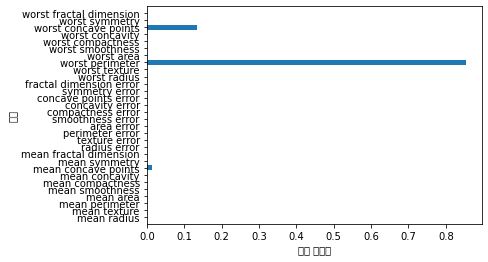

In [62]:
plot_feature_imp_cancer(tree)

##### 실습과제 2
    split, max_depth를 1,8까지 변경해 보고 각각의 결과값을 확인해 보자.
##### 실습과제 3
    (1) Bike 데이터 셋을 이용하여 의사결정트리 모델을 만들어 보고, 이를 이용하여 예측을 수행해 보자.
    (2) Titanic 데이터 셋을 이용하여 의사결정트리 모델을 만들어 보고, 이를 이용하여 예측을 수행해 보자.